Cindy Magaly Gutierrez Mendez
20016132

Problema 1

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image

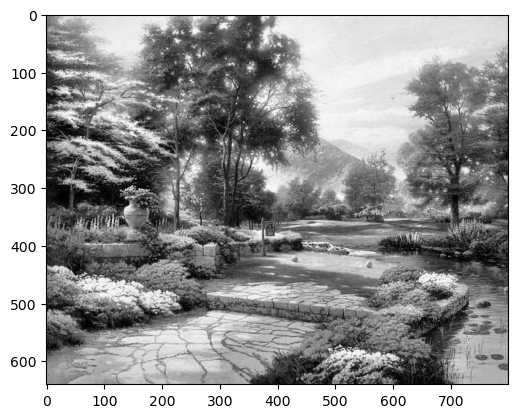

In [4]:
strImg = "imagen.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

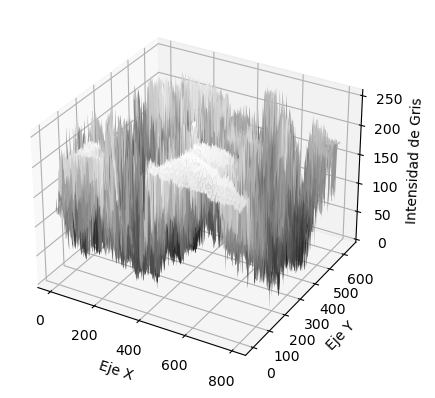

In [5]:
def mostrar_imagen_3D(imagen_path):
    
    img= cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    altura, ancho = img.shape

    x = np.arange(0, ancho)
    y = np.arange(0, altura)
    X, Y = np.meshgrid(x, y)

    Z = img

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='gray')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad de Gris')

    plt.show()

mostrar_imagen_3D("imagen.jpg")


Problema 2

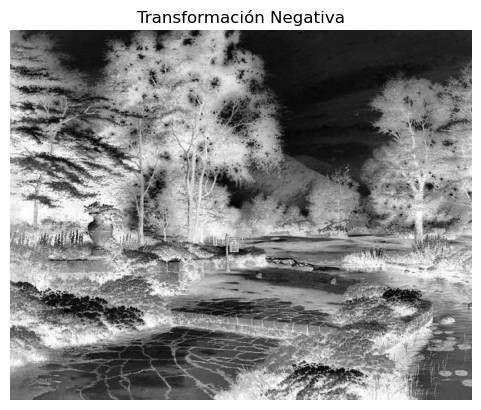

In [6]:
def transformacion_negativa_mostrar(image_path):
    
    img= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
   
    img_negativa = 255 - img
    

    plt.imshow(img_negativa, cmap='gray')
    plt.title('Transformación Negativa')
    plt.axis('off')
    plt.show()


transformacion_negativa_mostrar("imagen.jpg")


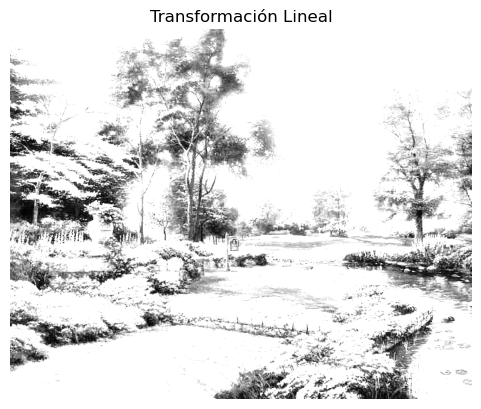

In [7]:
def transformacion_lineal_mostrar(image_path, pendiente, intercepto):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    img_transformada = cv2.convertScaleAbs(img, alpha=pendiente, beta=intercepto)
    
   
    plt.imshow(img_transformada, cmap='gray')
    plt.title('Transformación Lineal')
    plt.axis('off')
    plt.show()


pendiente = 2.0
intercepto = 50
transformacion_lineal_mostrar("imagen.jpg", pendiente, intercepto)


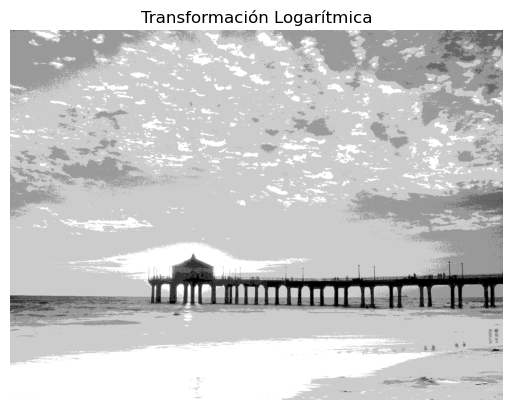

In [14]:
def transformacion_logaritmica_mostrar(image_path, c):
    
    imagen = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
   
    imagen_log = c * np.log1p(imagen)
    imagen_transformada = np.uint8(imagen_log)
    
   
    plt.imshow(imagen_transformada, cmap='gray')
    plt.title('Transformación Logarítmica')
    plt.axis('off')
    plt.show()


c = 1.0
transformacion_logaritmica_mostrar("imagen4.jpg", c)




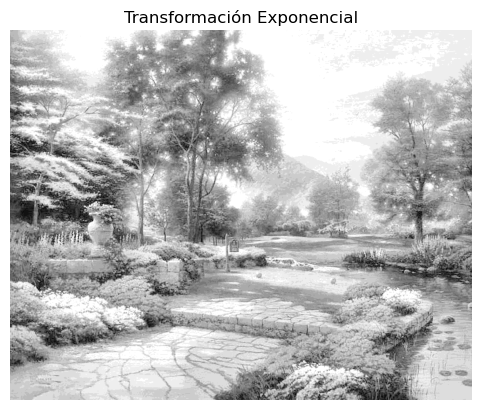

In [9]:
def transformacion_exponencial_mostrar(image_path, c, gamma):
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
  
    img_exp = c * np.power(img, gamma)
    img_transformada = np.uint8(img_exp)
    
   
    plt.imshow(img_transformada, cmap='gray')
    plt.title('Transformación Exponencial')
    plt.axis('off')
    plt.show()


c = 1.0
gamma = 0.5
transformacion_exponencial_mostrar("imagen.jpg", c, gamma)

Problema 3

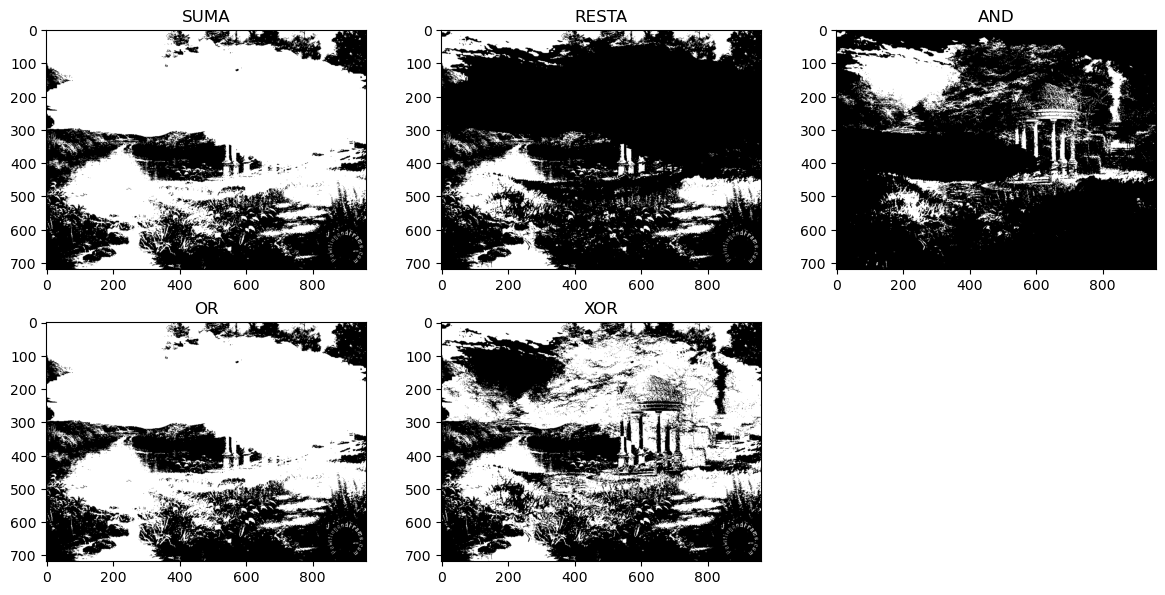

In [10]:
def realizar_operaciones(imagen1, imagen2):
    
    img1 = cv2.imread(imagen1)
    img2 = cv2.imread(imagen2)

  
    if img1.shape != img2.shape:
        height, width, _ = img1.shape
        img2 = cv2.resize(img2, (width, height))

    
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    
    _, binarized_img1 = cv2.threshold(gray_img1, 128, 255, cv2.THRESH_BINARY)
    _, binarized_img2 = cv2.threshold(gray_img2, 128, 255, cv2.THRESH_BINARY)

   
    suma = cv2.add(binarized_img1, binarized_img2)
    resta = cv2.subtract(binarized_img1, binarized_img2)
    and_op = cv2.bitwise_and(binarized_img1, binarized_img2)
    or_op = cv2.bitwise_or(binarized_img1, binarized_img2)
    xor = cv2.bitwise_xor(binarized_img1, binarized_img2)

   
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(suma, cmap='gray')
    plt.title('SUMA')

    plt.subplot(2, 3, 2)
    plt.imshow(resta, cmap='gray')
    plt.title('RESTA')

    plt.subplot(2, 3, 3)
    plt.imshow(and_op, cmap='gray')
    plt.title('AND')

    plt.subplot(2, 3, 4)
    plt.imshow(or_op, cmap='gray')
    plt.title('OR')

    plt.subplot(2, 3, 5)
    plt.imshow(xor, cmap='gray')
    plt.title('XOR')

    plt.tight_layout()
    plt.show()


img1 = "imagen1.jpg"
img2 = "imagen2.jpg"

realizar_operaciones(img1, img2)


Problema 4

In [11]:
import pandas as pd
from skimage.feature import canny
from sklearn.metrics import mean_squared_error

             Algoritmo                                           Ventajas  \
0                Canny                          Buena supresión de ruido.   
1    Operador de Sobel  Buena detección de bordes con alta dirección d...   
2  Operador Laplaciano  Buena detección de bordes con cambio de direcc...   

                                      Desventajas           MSE  
0                      Posibles falsos positivos.    109.737850  
1                              Sensible al ruido.  14453.772707  
2  Sensible a variaciones de iluminación y ruido.  16619.540739  


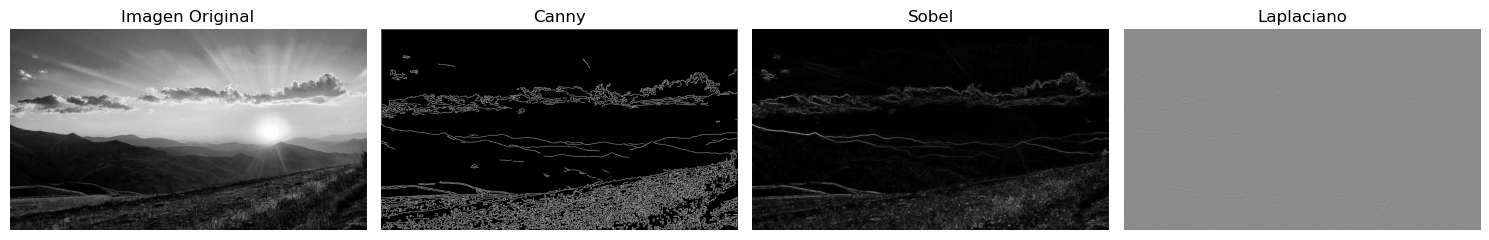

In [12]:

img = cv2.imread("imagen3.jpg", cv2.IMREAD_GRAYSCALE)


canny_edges = canny(img, sigma=1)


sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)


laplacian = cv2.Laplacian(img, cv2.CV_64F)


original_image = cv2.imread("imagen3.jpg", cv2.IMREAD_GRAYSCALE)
canny_mse = mean_squared_error(original_image, canny_edges)
sobel_mse = mean_squared_error(original_image, sobel_magnitude)
laplacian_mse = mean_squared_error(original_image, laplacian)


data = {
    "Algoritmo": ["Canny", "Operador de Sobel", "Operador Laplaciano"],
    "Ventajas": [
        "Buena supresión de ruido.",
        "Buena detección de bordes con alta dirección de gradiente.",
        "Buena detección de bordes con cambio de dirección de gradiente."
    ],
    "Desventajas": [
        "Posibles falsos positivos.",
        "Sensible al ruido.",
        "Sensible a variaciones de iluminación y ruido."
    ],
    "MSE": [canny_mse, sobel_mse, laplacian_mse]
}

df = pd.DataFrame(data)
print(df)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Imagen Original')

ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny')

ax[2].imshow(sobel_magnitude, cmap='gray')
ax[2].set_title('Sobel')

ax[3].imshow(laplacian, cmap='gray')
ax[3].set_title('Laplaciano')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


Problema 5

In [13]:

img = cv2.imread("imagen5.jpg")


def aplicar_filtro(img, kernel, nombre_filtro):
    

    resultado = cv2.filter2D(img, -1, kernel)
    

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    plt.title(nombre_filtro)
    
    plt.show()



# 1. Kernel Gaussiano
kernel_gaussiano = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16.0

# 2. Kernel Box (promedio)
kernel_box = np.ones((3, 3), dtype=np.float32) / 9.0

# 3. Kernel de mediana
kernel_mediana = np.ones((3, 3), dtype=np.uint8)

# 4. Kernel Sobel (detección de bordes en X e Y)
kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# 5. Kernel Laplaciano (detección de bordes)
kernel_laplaciano = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

# 6. Kernel de realce (Sharpening)
kernel_realce = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# 7. Kernel de relieve (Embossing)
kernel_embossing = np.array([[-2, -1, 0],
                            [-1, 1, 1],
                            [0, 1, 2]])

